# Studio e analisi degli effetti della crisi finanziaria del 2008 sulle azioni delle principali banche Americane ed Italiane  

# Candidato: Giuseppe Argentieri
# Relatore: Claudio Loconsole

____

Questo Lavoro di tesi sarà improntato sull'analisi esplorativa dei dei prezzi delle azioni delle principali banche Italiane e Americane.

Il focus sarà costituito dall'analisi della crisi finanziaria del 2008



## Data

I dati su cui sarà svolto il lavoro di tesi avranno come fonte "yahoo finance" e saranno presi attraverso il modulo pandas_datareader


### Imports
Nella cella sottostante sono riportati i moduli che useremo inizialmente.

## Banche 

Considereremo le seguenti banche Americane:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Considereremo le seguenti banche Italiane:
* Unicredit
* Montepaschi di Siena
* Intesa SanPaolo
* Banco Bpm
* Banca Popolare di Sondrio

____
L'arco temporale per il lavoro va dal 1 gennaio 2006 al  gennaio 2016

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [2]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [4]:
#UCG.MI unicredit
UC = data.DataReader("UCG.MI", 'yahoo', start, end)
#BMPS.MI  montepaschi di Siena
BMPS = data.DataReader("BMPS.MI", 'yahoo', start, end)
#ISP.MI    Intesa SanPaolo
ISP = data.DataReader("ISP.MI", 'yahoo', start, end)
#Banco Bpm.  BAMI.MI
BAMI = data.DataReader("BAMI.MI", 'yahoo', start, end)
#Banca Popolare di Sondrio S.p.A (BPSO.MI)
BPSO = data.DataReader("BPSO.MI", 'yahoo', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#yahoo finance in questo caso ci riporta i valori delle azioni 
#della banca Montepaschi di Siena con quattro zero aggiuntivi
BMPS['Close'] = BMPS['Close'].apply(lambda x : x/10000)

In [6]:
ita_tickers = ['BAMI', 'BMPS', 'BPSO', 'ISP', 'UC']
ita_bank_stocks = pd.concat([BAMI, BMPS, BPSO, ISP, UC],axis=1,keys= ita_tickers)
ita_bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
ita_bank_stocks.dtypes

Bank Ticker  Stock Info
BAMI         Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume        float64
BMPS         Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume          int64
BPSO         Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume        float64
ISP          Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume        float64
UC           Open          float64
             High          float64
             Low           float64
             Close         floa

In [8]:
bank_stocks.dtypes

Bank Ticker  Stock Info
BAC          Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume          int64
C            Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume          int64
GS           Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume          int64
JPM          Open          float64
             High          float64
             Low           float64
             Close         float64
             Adj Close     float64
             Volume          int64
MS           Open          float64
             High          float64
             Low           float64
             Close         floa

## Adesso esploriamo un pò i dati!
____
Qual'è il massimo 'Close Price' per ogni azione bancaria nell'intero arco temporale considerato?

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
BAC     3.14
C      10.20
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

In [11]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAMI    100.509163
BMPS    112.173637
BPSO     12.138954
ISP       5.851561
UC      204.799240
dtype: float64

In [12]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
BAMI     4.536156
BMPS     1.154000
BPSO     2.840000
ISP      0.868000
UC      11.453610
dtype: float64

In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmin()

Bank Ticker
BAC   2009-03-06
C     2009-03-05
GS    2008-11-20
JPM   2009-03-09
MS    2008-11-20
WFC   2009-03-05
dtype: datetime64[ns]

In [14]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmin()

Bank Ticker
BAMI   2012-07-24
BMPS   2015-12-14
BPSO   2015-01-12
ISP    2011-09-12
UC     2012-01-09
dtype: datetime64[ns]

In [15]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmax()

Bank Ticker
BAC   2006-11-16
C     2006-12-27
GS    2007-10-31
JPM   2015-07-22
MS    2007-06-14
WFC   2015-07-22
dtype: datetime64[ns]

In [16]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').idxmax()

Bank Ticker
BAMI   2007-05-02
BMPS   2007-05-18
BPSO   2007-05-08
ISP    2007-05-07
UC     2007-04-26
dtype: datetime64[ns]

In [17]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAMI    100.509163
BMPS    112.173637
BPSO     12.138954
ISP       5.851561
UC      204.799240
dtype: float64

In [18]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
BAMI     4.536156
BMPS     1.154000
BPSO     2.840000
ISP      0.868000
UC      11.453610
dtype: float64

In [19]:
list_10 = []
for i,v in bank_stocks['C']['Close'].items():
    if len(list_10) < 10:
        list_10.append(v)
        list_10.sort()
    for j in range(len(list_10)):
        if list_10[j] < v:
            list_10[j] = v
            list_10.sort()
list_10
#si parte dal più piccolo nel secondo ciclo for e se il + piccolo è minore del numero di interesse allora si sostituisce
#poché è ordinato se il più piccolo è maggiore allora anche gli altri lo saranno

[554.4000244140625,
 557.0,
 558.7999877929688,
 558.7999877929688,
 558.7999877929688,
 564.0999755859375,
 564.0999755859375,
 564.0999755859375,
 564.0999755859375,
 564.0999755859375]

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').std()

Bank Ticker
BAC     15.304887
C      177.398413
GS      35.635574
JPM      9.839554
MS      18.669383
WFC     10.012564
dtype: float64

In [21]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').std()

Bank Ticker
BAMI    28.035791
BMPS    36.201217
BPSO     2.156981
ISP      1.309805
UC      56.319097
dtype: float64

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').mean()

Bank Ticker
BAC     22.174660
C      145.388713
GS     158.481482
JPM     45.985546
MS      36.006198
WFC     35.598323
dtype: float64

In [23]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').mean()

Bank Ticker
BAMI    28.295616
BMPS    32.622374
BPSO     5.870907
ISP      2.780292
UC      69.979573
dtype: float64

____
Adesso consideriamo un nuovo DataFrame vuoto che chiamiamo returns. Questo Dataframe conterrà i rendimenti per ogni azione bancaria.
Diamo la definizione di returns o rendimenti azionari:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [24]:
returns = pd.DataFrame()

In [25]:
ita_returns = pd.DataFrame()

Possiamo usare il metodo panda pct_change() sulla colonna Close per creare una colonna che rappresenti questo valore di rendimento. Attraverso un ciclo for che va e per ogni Bank Stock Ticker creiamo questa colonna dei resi e la impostiamo come una colonna nel DataFrame dei resi.

In [26]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

In [27]:
ita_tickers = ['BAMI', 'BMPS', 'BPSO', 'ISP', 'UC']
for tick in ita_tickers:
    ita_returns[tick+' Return'] = ita_bank_stocks[tick]['Close'].pct_change()
ita_returns.head()

BAMI Return  BMPS Return  BPSO Return  ISP Return  UC Return
Date                                                                    
2006-01-02          NaN          NaN          NaN         NaN        NaN
2006-01-03     0.040268     0.000634     0.017756   -0.003880  -0.007666
2006-01-04     0.001290     0.005700     0.026963    0.014469   0.001717
2006-01-05    -0.001289    -0.002519     0.000000   -0.018102  -0.021422
2006-01-06     0.036129    -0.008838    -0.003089    0.000000   0.000000

Creiamo un pairplot dei dataframe dei rendimenti usando il modulo Seaborn

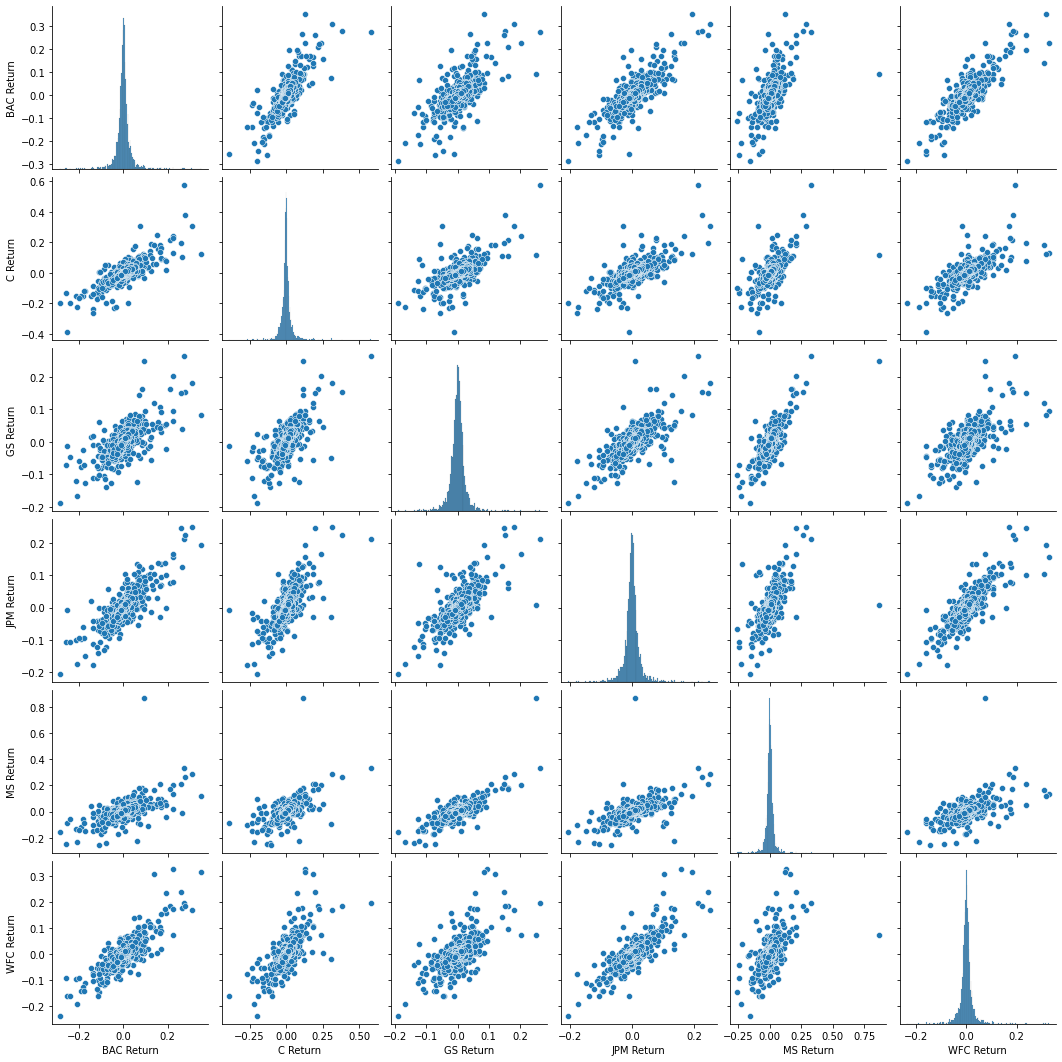

In [28]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

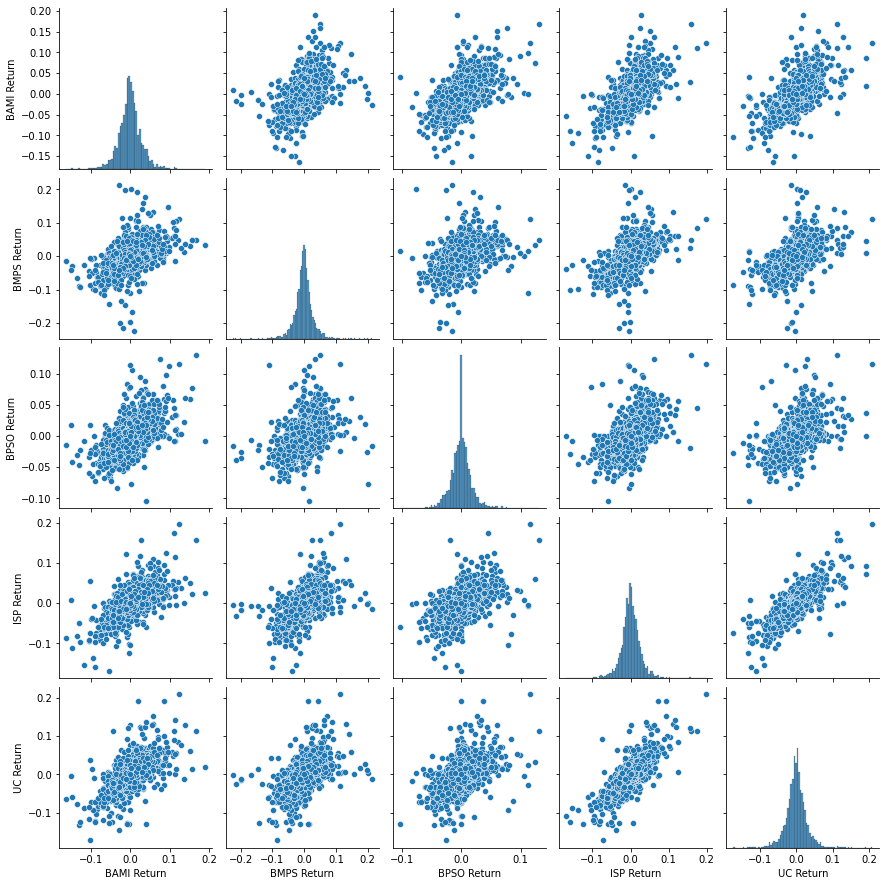

In [29]:
sns.pairplot(ita_returns[1:])

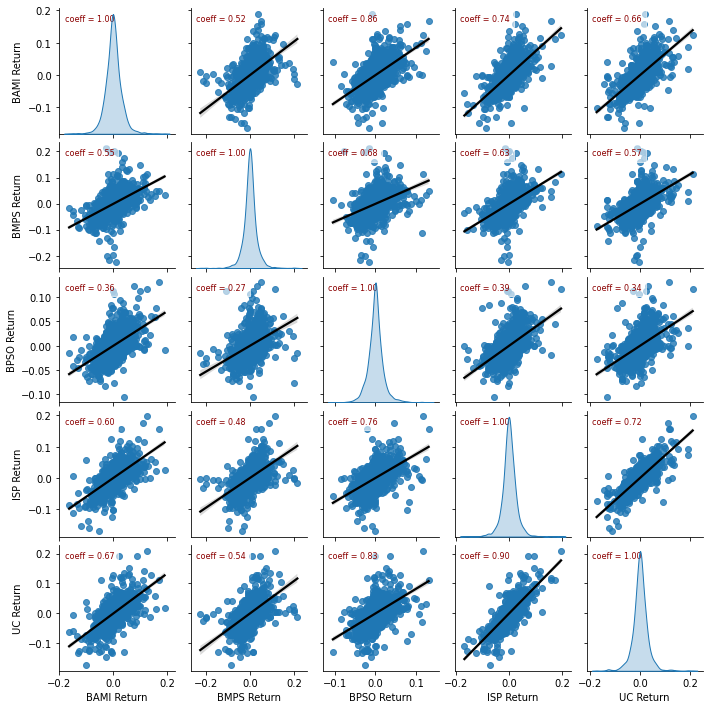

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'coeff = {slope :.2f}',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')
g = sns.pairplot(ita_returns[1:], kind='reg', diag_kind='kde', height=2,plot_kws={'line_kws': {'color': 'black'}})
g.map(r2)

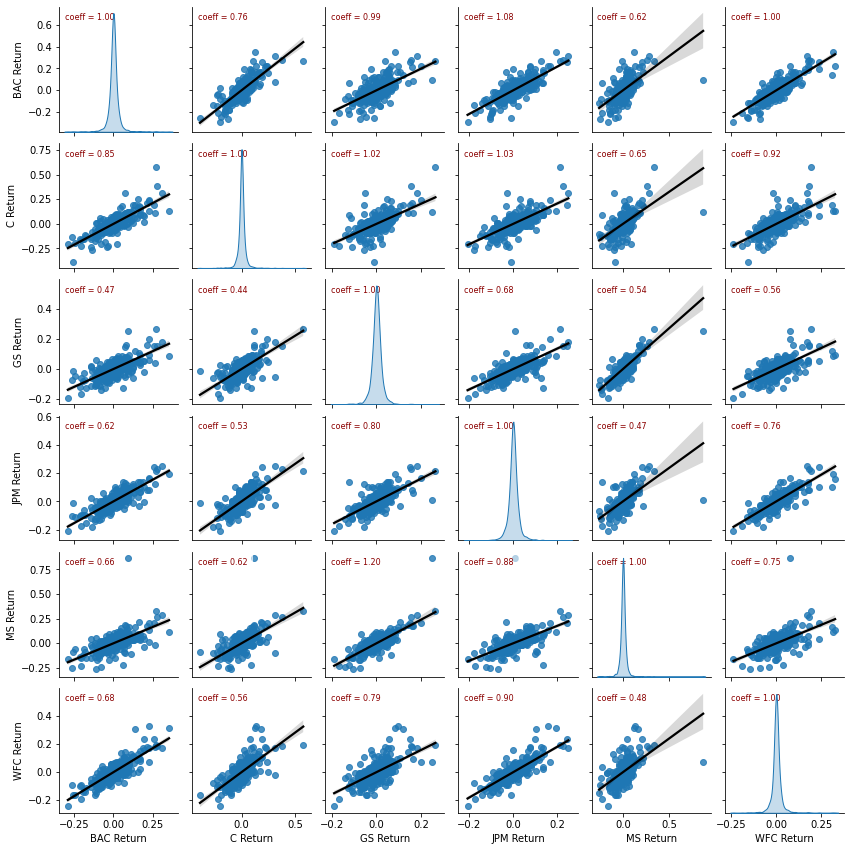

In [31]:
g = sns.pairplot(returns[1:], kind='reg', diag_kind='kde', height=2,plot_kws={'line_kws': {'color': 'black'}})
g.map(r2)

### Usando questo DataFrame dei rendimenti, scopriamo in quali date ciascuna azione bancaria ha avuto i rendimenti migliori e peggiori. Per quanto riguarda i rendimenti peggiori, si può notare che alcune banche Americane condividono lo stesso giorno e comunque il periodo di riferimento è quasi lo stesso per tutte (2008-2009)

In [32]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [33]:
ita_returns.idxmin()

BAMI Return   2008-12-01
BMPS Return   2008-04-28
BPSO Return   2008-10-08
ISP Return    2008-11-11
UC Return     2012-01-05
dtype: datetime64[ns]

In [34]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [35]:
ita_returns.idxmax()

BAMI Return   2012-05-21
BMPS Return   2014-06-16
BPSO Return   2008-10-13
ISP Return    2010-05-10
UC Return     2010-05-10
dtype: datetime64[ns]

### adesso cerchiamo di capire quali sono le azioni bancarie più rischiose

In [36]:
returns.std() # Citigroup

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [37]:
ita_returns.std() #Montepaschi

BAMI Return    0.030308
BMPS Return    0.031258
BPSO Return    0.019549
ISP Return     0.027334
UC Return      0.030504
dtype: float64

In [38]:
returns.mean()

BAC Return    0.000258
C Return     -0.000157
GS Return     0.000452
JPM Return    0.000575
MS Return     0.000423
WFC Return    0.000657
dtype: float64

In [39]:
ita_returns.mean()

BAMI Return   -0.000274
BMPS Return   -0.001176
BPSO Return   -0.000057
ISP Return     0.000251
UC Return     -0.000247
dtype: float64

____
# Adesso creeremo delle visualizzazioni per vedere l'andamento delle azioni nell'intero intervallo temporale considerato



### Imports

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

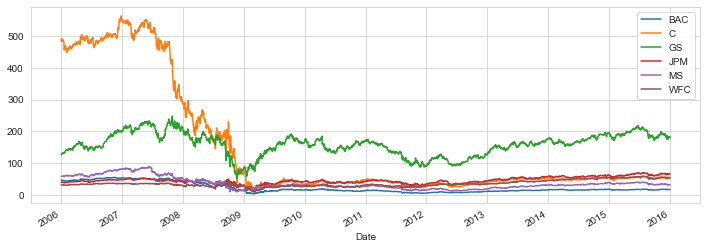

In [41]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

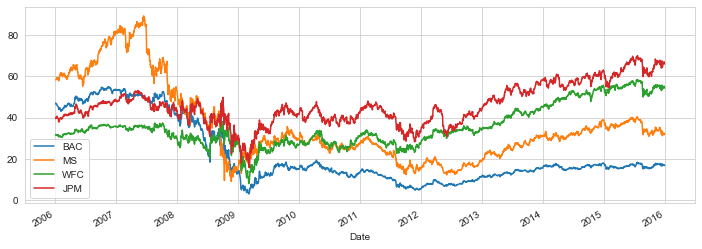

In [42]:
temp_bank_stocks = bank_stocks[['BAC','MS','WFC','JPM']]
for tick in ['BAC','MS','WFC','JPM']:
    temp_bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

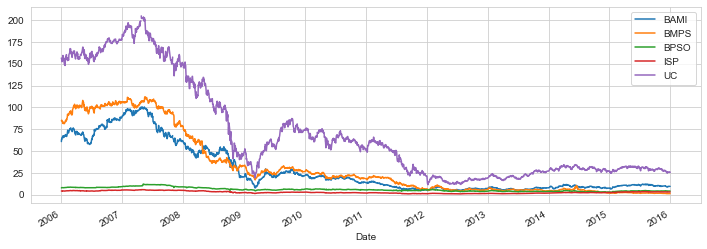

In [43]:
for tick in ita_tickers:
    ita_bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

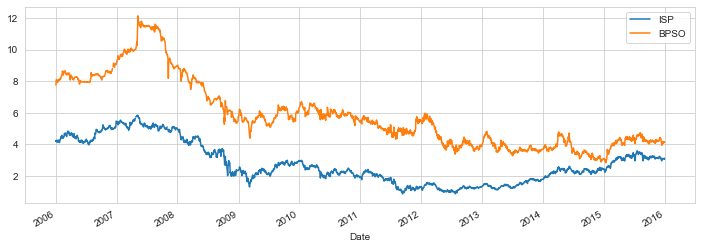

In [44]:
temp_ita_bank_stocks = ita_bank_stocks[['ISP','BPSO']]
for tick in ['ISP','BPSO']:
    temp_ita_bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

### E se volessimo un tooltip che ci indichi per un determinato mese il valore dell'azione?

In [45]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot() 

In [46]:
temp_bank_stocks = bank_stocks[['BAC','MS','WFC','JPM']]
temp_bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot() 

In [47]:
temp_ita_bank_stocks = ita_bank_stocks[['ISP','BPSO']]
temp_ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot() 

In [48]:
ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot() 

## Medie Mobili

### Analizziamo le medie mobili mensili del Close price per tutto l'intervallo temporale 

#### è utile vedere prima il grafico senza medie mobili per vedere come cambia

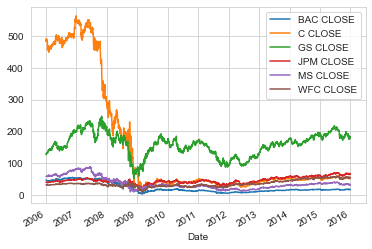

In [49]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label= tick +' CLOSE')
plt.legend()
plt.rcParams["figure.figsize"] = (20,5)

#### con le medie mobili

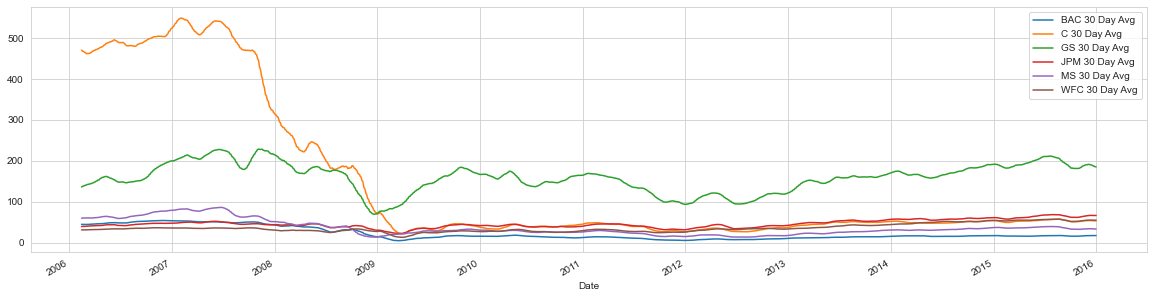

In [50]:
for tick in tickers:
    bank_stocks[tick]['Close'].rolling(window=30).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

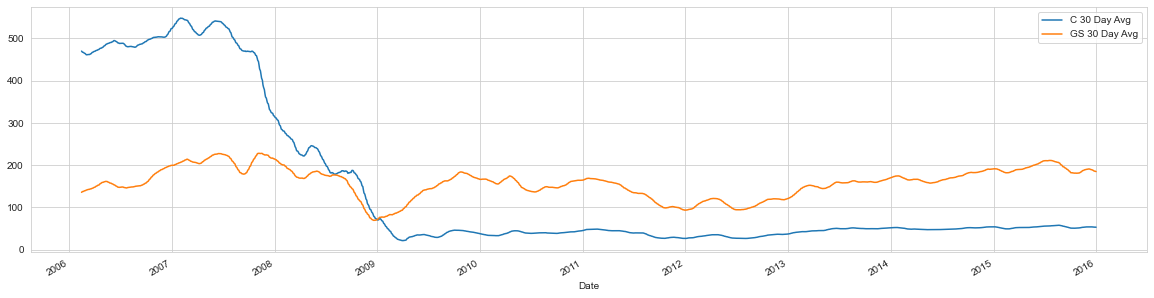

In [51]:
temp2_bank_stocks = bank_stocks[['C','GS']]
for tick in ['C','GS']:
    temp2_bank_stocks[tick]['Close'].rolling(window=30).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

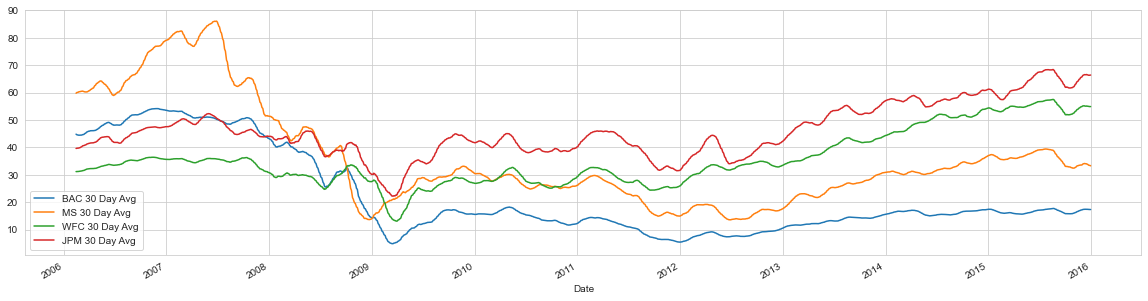

In [52]:
temp_bank_stocks = bank_stocks[['BAC','MS','WFC','JPM']]
for tick in ['BAC','MS','WFC','JPM']:
    bank_stocks[tick]['Close'].rolling(window=30).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

#### Per le banche Italiane..

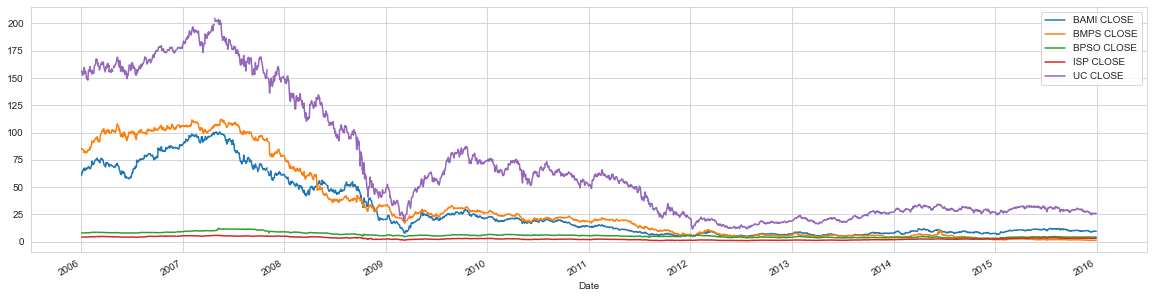

In [53]:
for tick in ita_tickers:
    ita_bank_stocks[tick]['Close'].plot(label= tick +' CLOSE')
plt.legend()

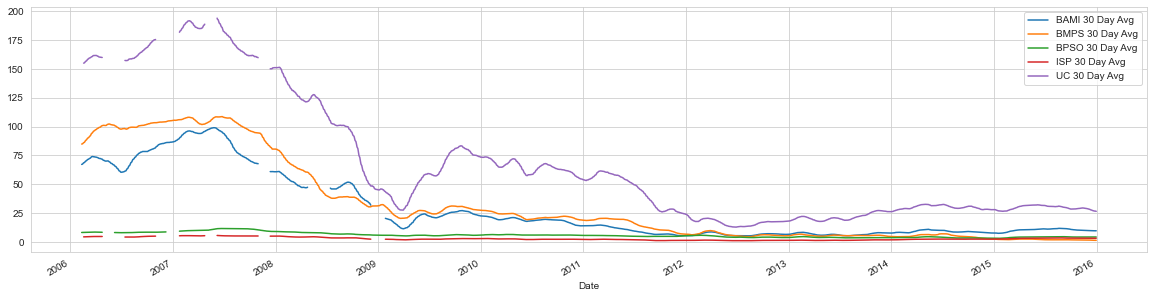

In [54]:
for tick in ita_tickers:
    ita_bank_stocks[tick]['Close'].rolling(window=30).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

### perché accade questo? facendo un pò di indagini è stato scoperto che ci sono dei NA nei dati. Per le Rolling aggregation functions non c'è l'opzione di fare uno skip dei NA, ma nel metodo Rolling può essere aggiunta la variabile 'min_period', ovvero il numero minimo di osservazioni nella window richiesta per avere un valore (altrimenti il risultato è NA).

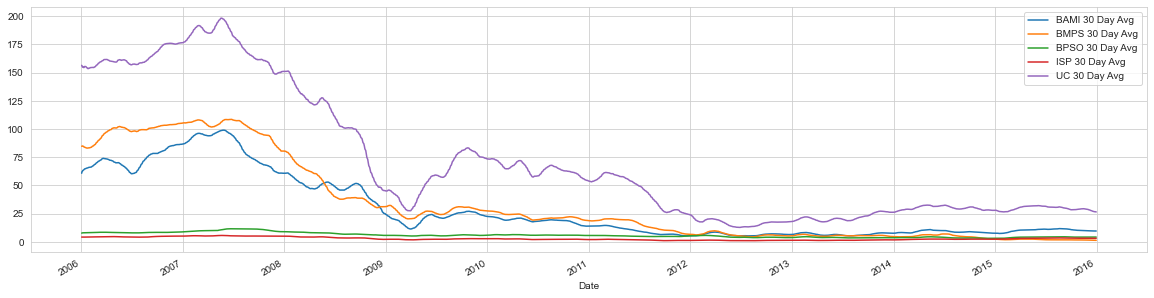

In [55]:
for tick in ita_tickers:
    ita_bank_stocks[tick]['Close'].rolling(window=30, min_periods=1).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

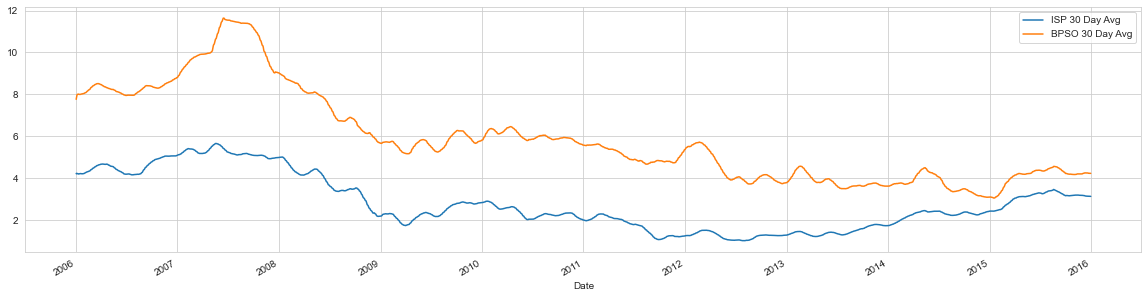

In [56]:
temp_ita_bank_stocks = ita_bank_stocks[['ISP','BPSO']]
for tick in ['ISP','BPSO']:
    temp_ita_bank_stocks[tick]['Close'].rolling(window=30, min_periods=1).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

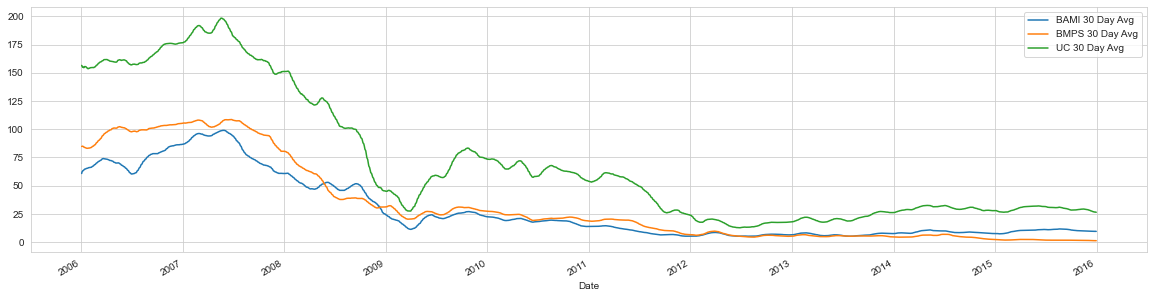

In [57]:
temp2_ita_bank_stocks = ita_bank_stocks[['BAMI','BMPS','UC']]
for tick in ['BAMI','BMPS','UC']:
    temp2_ita_bank_stocks[tick]['Close'].rolling(window=30, min_periods=1).mean().plot(label= tick + ' 30 Day Avg')
plt.legend()

### Abbiamo quindi scoperto che ci sono dei NA nei dati Italiani, facciamo un indagine per scoprire quanti sono

In [58]:
ita_bank_stocks[ita_bank_stocks.isna().any(axis=1)]

Bank Ticker       BAMI                                                         \
Stock Info        Open       High        Low      Close  Adj Close     Volume   
Date                                                                            
2006-01-06   63.522446  65.563652  63.155025  65.563652  46.303707   742152.0   
2006-04-25   68.829590  69.237831  68.380524  68.747940  48.552586   141755.0   
2006-06-02   64.093987  64.951294  63.399971  64.012337  47.284603   582112.0   
2006-11-01   85.159264  86.873886  85.077621  86.220695  63.689468  2819056.0   
2006-12-08   85.975754  86.220695  85.567513  85.975754  63.508530   967056.0   
2007-04-25   97.978065  99.855980  97.978065  99.692680  73.640938   681435.0   
2007-11-01         NaN        NaN        NaN        NaN        NaN        NaN   
2008-04-25         NaN        NaN        NaN        NaN        NaN        NaN   
2008-06-02         NaN        NaN        NaN        NaN        NaN        NaN   
2008-12-08         NaN        NaN        NaN        NaN        NaN        NaN   

Bank Ticker          BMPS                                          ...  \
Stock Info           Open          High           Low       Close  ...   
Date                                                               ...   
2006-01-06   8.488234e+05  8.498979e+05  8.413022e+05   84.345119  ...   
2006-04-25   1.013753e+06  1.022349e+06  1.012679e+06  102.234875  ...   
2006-06-02   1.006769e+06  1.014290e+06  9.917267e+05  100.139681  ...   
2006-11-01   1.033631e+06  1.041152e+06  1.033093e+06  103.685400  ...   
2006-12-08   1.045450e+06  1.050822e+06  1.037928e+06  104.168906  ...   
2007-04-25   1.058343e+06  1.069088e+06  1.053508e+06  106.801338  ...   
2007-11-01   9.508972e+05  9.519716e+05  9.208123e+05   92.779631  ...   
2008-04-25   5.882669e+05  6.355431e+05  5.506608e+05   61.405394  ...   
2008-06-02   4.426776e+05  4.426776e+05  4.287096e+05   43.193297  ...   
2008-12-08   3.272805e+05  3.502740e+05  3.272805e+05   34.167831  ...   

Bank Ticker       ISP                                          UC              \
Stock Info        Low     Close Adj Close      Volume        Open        High   
Date                                                                            
2006-01-06        NaN       NaN       NaN         NaN         NaN         NaN   
2006-04-25        NaN       NaN       NaN         NaN         NaN         NaN   
2006-06-02        NaN       NaN       NaN         NaN         NaN         NaN   
2006-11-01        NaN       NaN       NaN         NaN         NaN         NaN   
2006-12-08        NaN       NaN       NaN         NaN         NaN         NaN   
2007-04-25        NaN       NaN       NaN         NaN         NaN         NaN   
2007-11-01        NaN       NaN       NaN         NaN         NaN         NaN   
2008-04-25   4.468124  4.500841  1.835572  41693965.0  128.532852  133.266174   
2008-06-02   3.844176  3.860534  1.715210  60658293.0  119.266220  119.332893   
2008-12-08        NaN       NaN       NaN         NaN   42.586510   45.333164   

Bank Ticker                                                
Stock Info          Low       Close  Adj Close     Volume  
Date                                                       
2006-01-06          NaN         NaN        NaN        NaN  
2006-04-25          NaN         NaN        NaN        NaN  
2006-06-02          NaN         NaN        NaN        NaN  
2006-11-01          NaN         NaN        NaN        NaN  
2006-12-08          NaN         NaN        NaN        NaN  
2007-04-25          NaN         NaN        NaN        NaN  
2007-11-01          NaN         NaN        NaN        NaN  
2008-04-25   128.399521  132.132843  87.748566  5593304.0  
2008-06-02   116.799568  117.132896  82.337173  4879658.0  
2008-12-08    42.373177   45.333164  31.866413  4415111.0  

[10 rows x 30 columns]

### questo significa che solo in 10 righe abbiamo almeno un NA. Facciamo una ulteriore indagine sulla colonna Close, principale tema di questa analisi.

In [59]:
totale = len(ita_bank_stocks)
for tick in ita_tickers:
    conta = 0
    for v in list(ita_bank_stocks[tick]['Close']):
        if pd.isna(v):
            conta+=1
    print('\033[1m' + tick )
    print('\033[0m' + 'Numero di NA', conta)
    print('Percentuale di NA è', '{:.2%}'.format(conta/totale))
    print('\n')

BAMI
Numero di NA 4
Percentuale di NA è 0.16%


BMPS
Numero di NA 0
Percentuale di NA è 0.00%


BPSO
Numero di NA 2
Percentuale di NA è 0.08%


ISP
Numero di NA 8
Percentuale di NA è 0.32%


UC
Numero di NA 7
Percentuale di NA è 0.28%




### Le percentuali sono basse, non siamo neanche al 1% nel caso massimo

# Adesso facciamo una analisi approfondita della correlazione creando un heatmap del Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

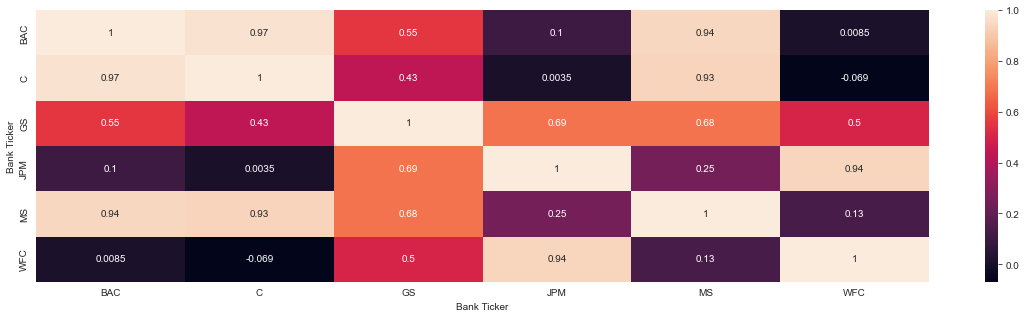

In [60]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

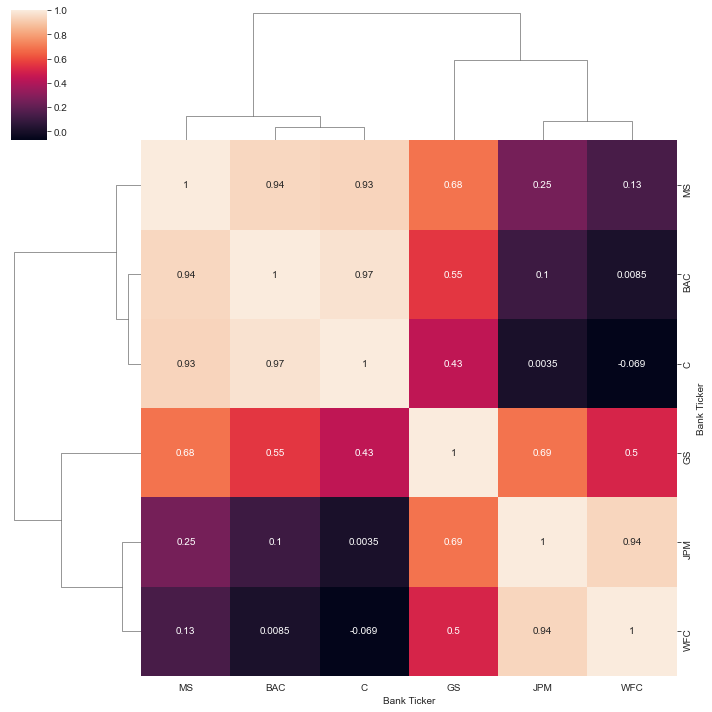

In [61]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)

### JPMorgan Chase e Wells Fargo ricadono nel cluster più ravvicinato avendo una correlazione molto prossima ad 1, lo stesso per Bank of America e CitiGroup. Goldman Sachs si avvicina di più, in termini di correlazione, al cluster JPMorgan Chase-Wells Fargo e Morgan Stanley a quello Bank of America-CitiGroup

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

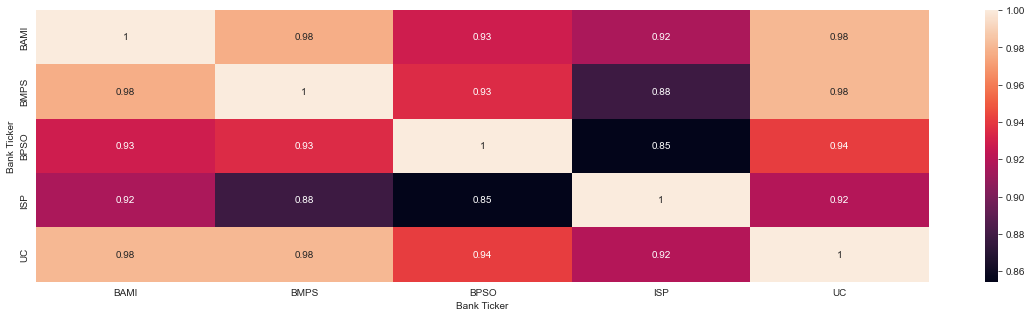

In [62]:
sns.heatmap(ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

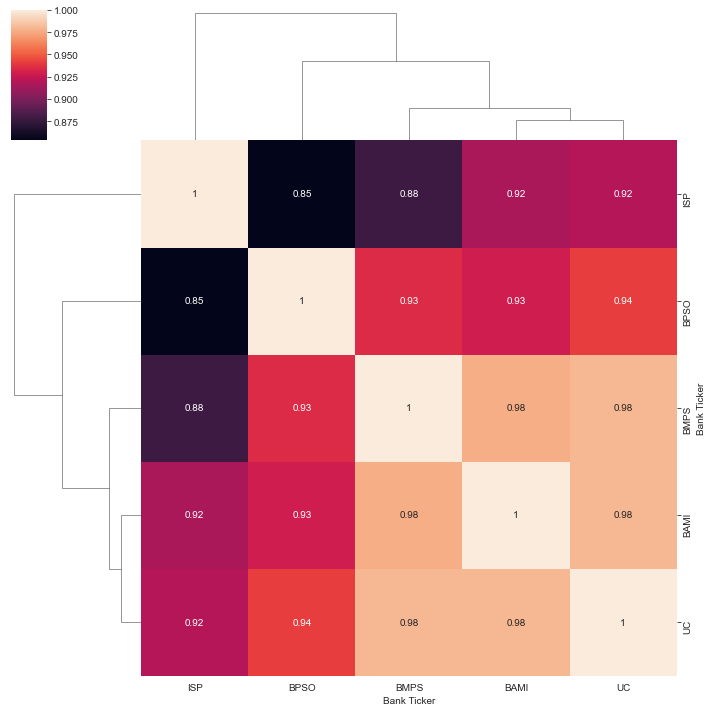

In [63]:
sns.clustermap(ita_bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)

### Impressionante la correlazione tra Unicredit e Banco Bpm, motivo per cui cadono nel cluster più ravvicinato. In termini di correlazione le altre si avvicinano a queste due nel seguente ordine: Montepaschi, Banca Popolare di Sondrio e Intesa SanPaolo

### Adesso consideriamo la correlazione tra tutte le azioni

In [64]:
stocks = pd.concat([BAC, C, GS, JPM, MS, WFC,BAMI, BMPS, BPSO, ISP, UC],axis=1,keys=tickers+ita_tickers)
stocks.columns.names = ['Bank Ticker','Stock Info']

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

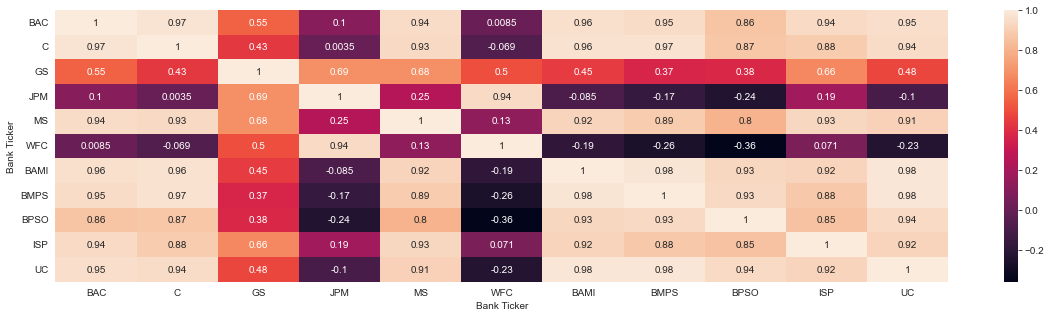

In [65]:
sns.heatmap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

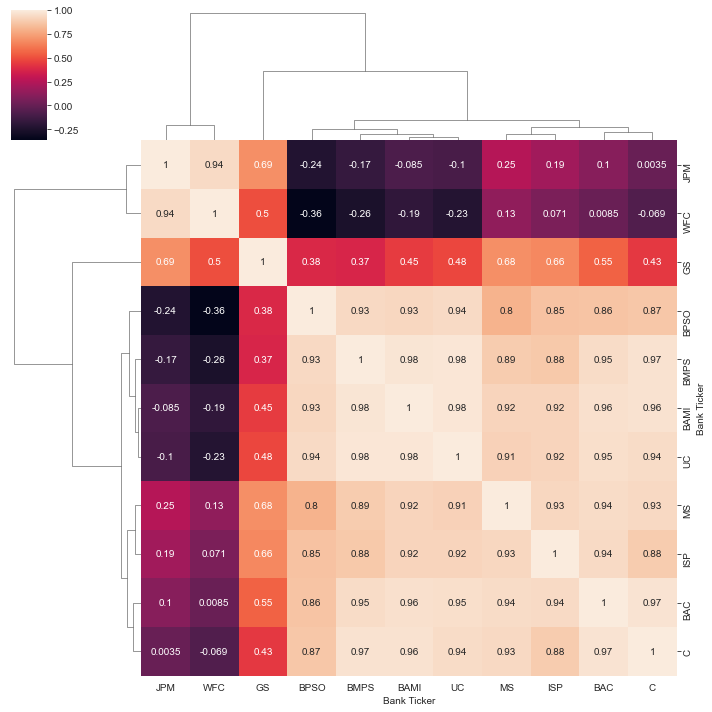

In [66]:
stocks = pd.concat([BAC, C, GS, JPM, MS, WFC,BAMI, BMPS, BPSO, ISP, UC],axis=1,keys=tickers+ita_tickers)
stocks.columns.names = ['Bank Ticker','Stock Info']
sns.clustermap(stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)